<a href="https://colab.research.google.com/github/ThomasDeCarvalho/slic-based-segmentation/blob/master/SLIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!tar -xzf /content/drive/My\ Drive/Dataset/BSR_bsds500.tgz

train_path = 'BSR/BSDS500/data/images/train/'
train_gt_path = 'BSR/BSDS500/data/groundTruth/train/'

Mounted at /content/drive


In [0]:
pip install scikit-image

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import os

from skimage.io import imread
from skimage.segmentation import slic, mark_boundaries, find_boundaries, join_segmentations

In [0]:
train_im = os.listdir(train_path)
train_names = []
for i in train_im:
  train_names.append(os.path.splitext(os.path.basename(i))[0])

In [0]:
def load(name):
  im = imread(train_path + name + '.jpg')
  ground_truth = sio.loadmat(train_gt_path + name + '.mat')['groundTruth']
  seg = []
  for i in ground_truth[0]:
    seg.append(i['Segmentation'][0, 0])
  return im, seg

In [0]:
def show(im, seg):
  fig, ax = plt.subplots(1, len(seg) + 1, figsize=(5 * (len(seg) + 1), 3))
  ax[0].imshow(im)
  for i in range(1, len(seg) + 1):
    ax[i].imshow(seg[i - 1], cmap='nipy_spectral')

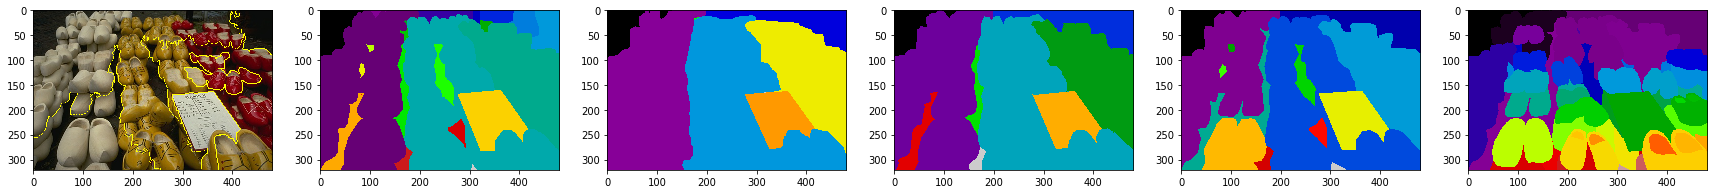

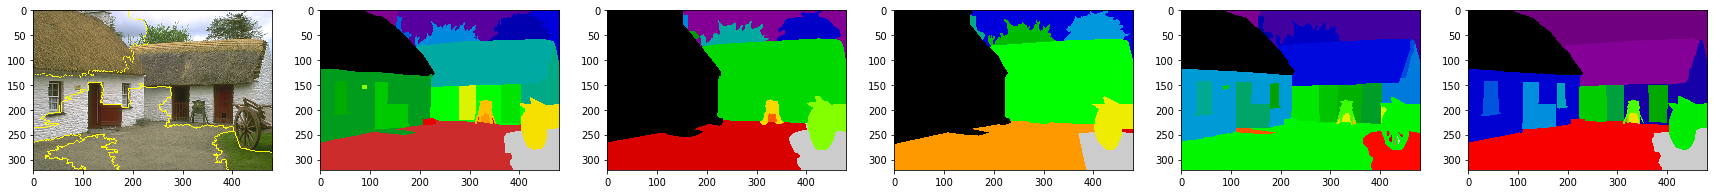

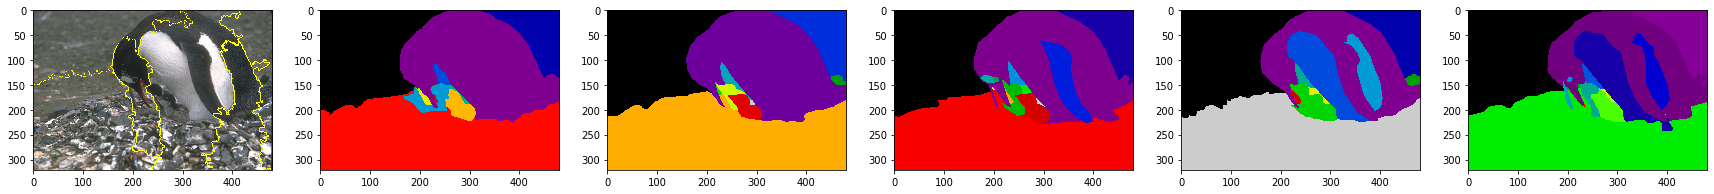

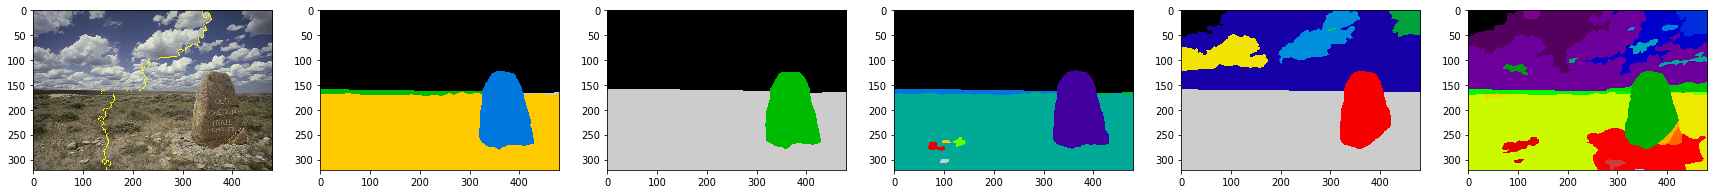

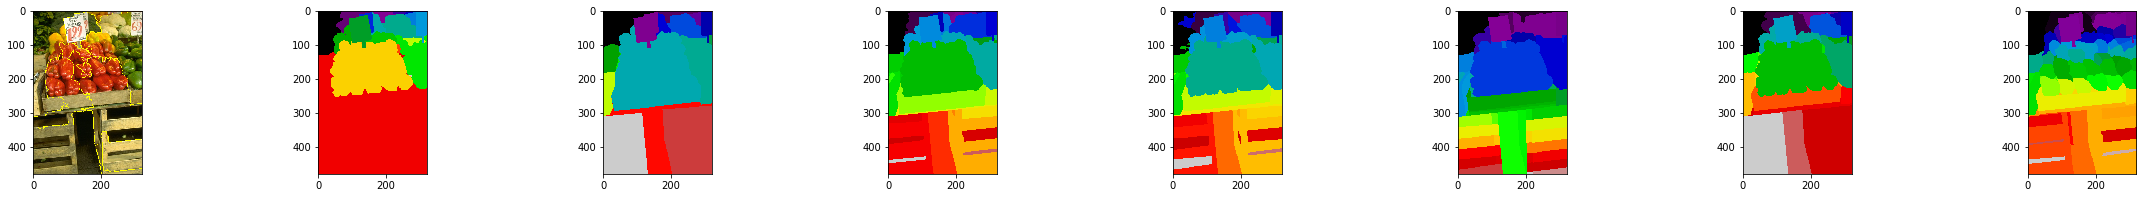

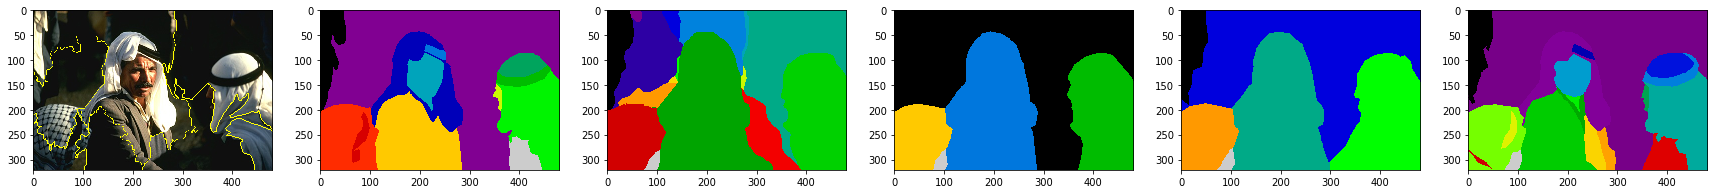

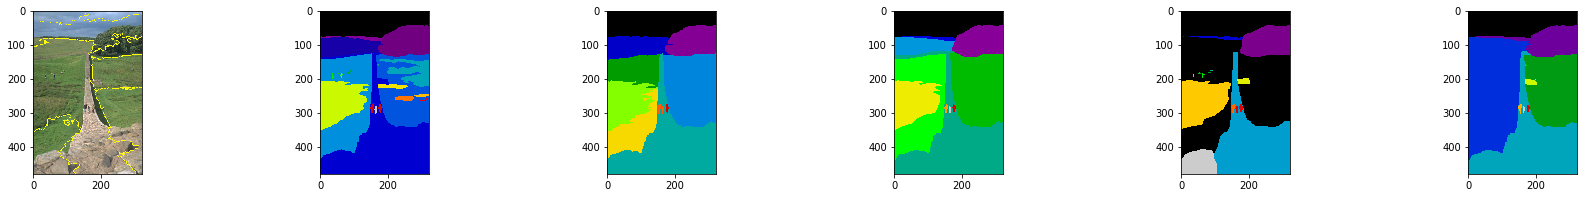

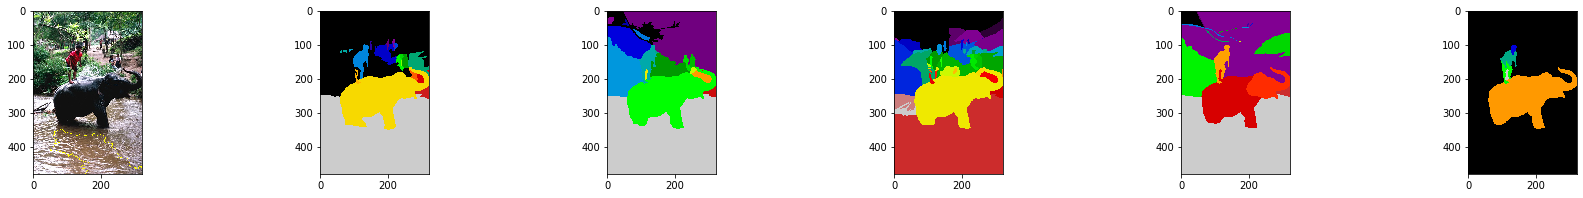

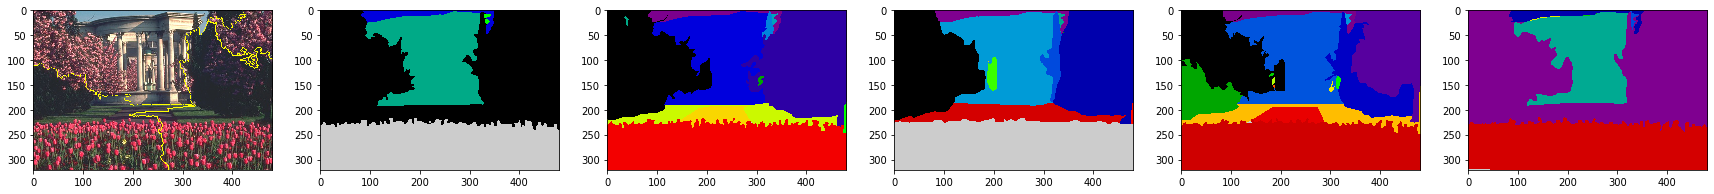

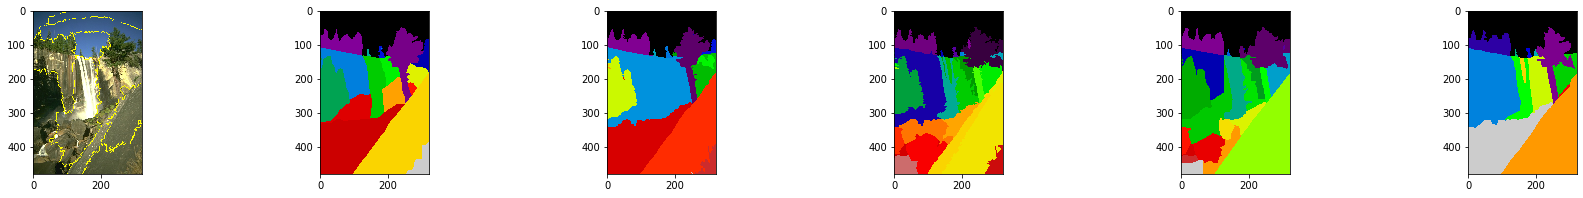

In [0]:
for i in range(10):
  im, seg = load(train_names[i])
  segs = slic(im, n_segments=25, compactness=1, max_iter=10)
  show(mark_boundaries(im, segs), seg)

In [0]:
# à tej
def under_seg_error(im, seg, B=0.05):
  res = 0
  for s in seg:
    sum = 0
    for i in np.unique(s):
      count = 0
      sum2 = 0
      for j in np.unique(im):
        mask1 = im == j
        mask2 = s == i
        inter = np.zeros_like(mask1)
        for (m, n), _ in np.ndenumerate(inter):
          inter[m, n] = mask1[m, n] and mask2[m, n]
        if len(im[inter]) > B * len(im[mask1]):
          count += 1
          sum2 += len(im[mask1])
      sum += sum2      
    sum -= im.shape[0] * im.shape[1]
    print(sum / (im.shape[0] * im.shape[1]))
    res += sum / (im.shape[0] * im.shape[1])
  
  return res / len(seg)

In [0]:
def boundary_recall(im, seg):
  tot = 0
  for s in seg:
    seg_bound = find_boundaries(s)
    im_bound = find_boundaries(im)
    res = 0
    for (i, j), _ in np.ndenumerate(im):
      if seg_bound[i, j] and im_bound[i, j]:
        res += 1
    tot += res / len(s[seg_bound])
  return tot / len(seg)

In [0]:
boundary_recall(segs, seg)

0.20734011975559058

In [0]:
under_seg_error(segs, seg)

1.4045116288106942
1.0973309758356486
1.8035375418552988
2.0019948057331236
0.9443138321642994


1.4503377568798128

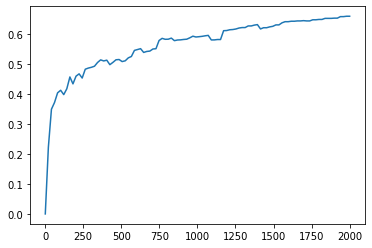

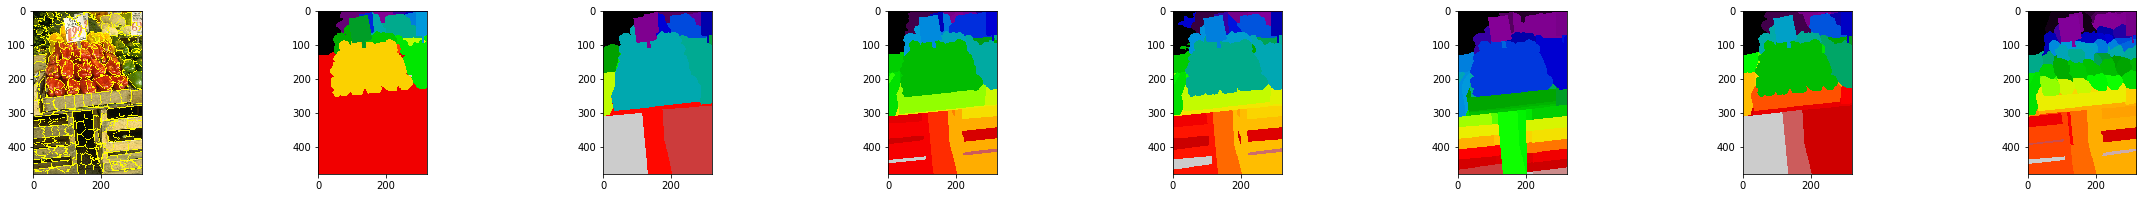

In [0]:
x = np.linspace(1, 2000, 100)
y = []
for i in x:
  im, seg = load(train_names[4])
  segs = slic(im, n_segments=i, compactness=10, max_iter=10)
  y.append(boundary_recall(segs, seg))
plt.plot(x,y)

segs = slic(im, n_segments=250, compactness=10, max_iter=10)
show(mark_boundaries(im, segs), seg)